In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Definition


Machine learning is branch of Artificial Intelligence (AI) scientific study of algorithms and statistical models that computer systems use to perform a specific task without being explicitly programmed.

Use cases -:
1. AI Chatbots like Google Assistant , Siri, Alexa, etc.
2. Stock Market Analysis
3. Healthcare Systems
4. Disease Detection
5. Spam Filtration of E-mails
6. Traffic Analysis On Google Maps (Using ML models)
7. Recommendation Systems (recommending the products according to the interests of the user making use of its feedback on different sites like Amazon, Flipkart and other e-commerce site makes use of it).
There exists many examples of Machine learning which we can observe in our daily life.
Resources : Refer to internet to checkout other use cases.

# Types Of Machine Learning Models

1. Supervised
2. Unsupervised
3. Reinforcement
4. Semi-Supervised
5. Active

In this entire documentation we will mainly focus on the first four classifications of Machine Learning.

Resources :
1. https://www.researchgate.net/profile/Batta-Mahesh/publication/344717762_Machine_Learning_Algorithms_-A_Review/links/5f8b2365299bf1b53e2d243a/Machine-Learning-Algorithms-A-Review.pdf?eid=5082902844932096t




# # Supervised Learning

Here, the machine is provided with the labelled data for both the input and the output as well. During the training of model , the supervised algorithm generated the mapping function that can identify the expected outputs.

Use Cases -:
1. Spam Filteration
2. Disease Detection
3. Image Classification , etc.

Supervised algorithm has further two classifications such as-:
1. Classification
2. Regression

# Classification

Classification : Predict categorical values which divides the data on basis of some category. Maps input features to probability distribution over output classes.

Resources: https://www.researchgate.net/profile/Batta-Mahesh/publication/344717762_Machine_Learning_Algorithms_-A_Review/links/5f8b2365299bf1b53e2d243a/Machine-Learning-Algorithms-A-Review.pdf?eid=5082902844932096t



# # Logistic Regression

## # Prediction of diabetes

## Dataset Link :
https://www.kaggle.com/code/mragpavank/pima-indians-diabetes-database/input

Description:
This dataset is used to predict whether a patient has diabetes based on various medical features. It is a binary classification task that can be effectively handled using Logistic Regression. The dataset includes features such as the number of pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, and age.

Key Points:

Task Type: Binary Classification
Model: Logistic Regression
Objective: Predict the likelihood of diabetes based on medical features.

## # Data loading and preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
url = "/content/drive/MyDrive/MyMLNotes/datasets/diabetes.csv"  # Path where you have saved the dataset
data = pd.read_csv(url)  # Use this if your dataset includes headers

# Display the first few rows to verify
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Separate features and target variable (Outcome)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## #Train the Model

In [ ]:
# Build and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

## #Make Predictions and Evaluate the Model

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.7143
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix:
[[82 18]
 [26 28]]
ROC-AUC Score: 0.8230


## #Plot the AUC-ROC curve

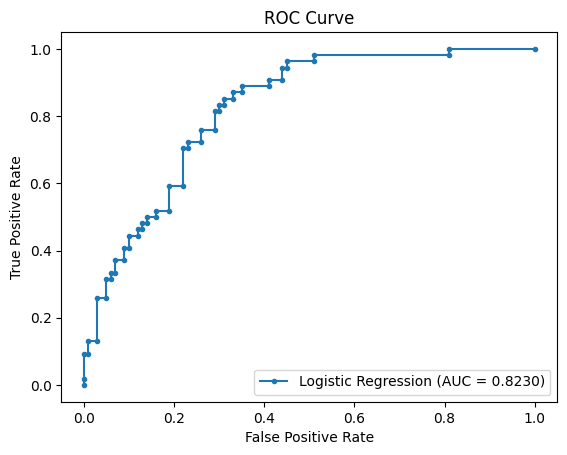

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %.4f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# # K Nearest Neighbour

## # Dataset link :
https://www.kaggle.com/datasets/arshid/iris-flower-dataset

The Iris dataset is a classic dataset used for classification tasks. It contains measurements of different features for three species of iris flowers.

## #Data loading and preprocessing

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

# Display the first few rows
print(data.head())


# Separate features and target variable
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target variable




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## # splitting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## #Training and Evaluating KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.9333


# Support Vector Machines

## # Dataset link: same as used for KNearest Neighbour


## #Data loading and preprocessing

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

# Display the first few rows
print(data.head())

# Separate features and target variable
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target variable


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## #Split the data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## # Training and evaluating the model

In [ ]:
# Train SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_scaled)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")

SVM Accuracy: 1.0000


# #Naive Bayes

## #Dataset link:
https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Farshid%2Firis-flower-dataset

## # Data loading and Preprocessing

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

# Display the first few rows
print(data.head())

# Separate features and target variable
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target variable



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## #Split the data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (optional, as Naive Bayes is generally not sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




## # training and evaluating the model

In [ ]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test_scaled)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Naive Bayes Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Random Forest

## # Dataset Link:
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv



## # Data loading and preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f'feature_{i}' for i in range(57)] + ['spam']
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows
print(data.head())

# Separate features and target variable
X = data.drop('spam', axis=1)  # Features
y = data['spam']  # Target variable




   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0       0.00       0.00       0.00       0.00  ...        0.00       0.000   
1       0.21       0.07       0.00       0.94  ...        0.00       0.132   
2       0.19       0.12       0.64       0.25  ...        0.01       0.143   
3       0.31       0.63       0.31       0.63  ...        0.00       0.137   
4       0.31       0.63       0.31       0.63  ...        0.00       0.135   

   feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  \
0         0.0       0.778  

## #Split the data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## # Training and evaluation


In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators and other hyperparameters
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Random Forest Accuracy: 0.9555

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



# Decision Tree

## #Dataset link:
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

## #Data Loading and preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f'feature_{i}' for i in range(57)] + ['spam']
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows
print(data.head())

# Separate features and target variable
X = data.drop('spam', axis=1)  # Features
y = data['spam']  # Target variable




   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0       0.00       0.00       0.00       0.00  ...        0.00       0.000   
1       0.21       0.07       0.00       0.94  ...        0.00       0.132   
2       0.19       0.12       0.64       0.25  ...        0.01       0.143   
3       0.31       0.63       0.31       0.63  ...        0.00       0.137   
4       0.31       0.63       0.31       0.63  ...        0.00       0.135   

   feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  \
0         0.0       0.778  

## #Split the data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## #Training and evaluation

In [ ]:
# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Decision Tree Accuracy: 0.9186

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.92      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



# Regression

Regression : Used to predict continuous integer/ Numeric values.



# Linear Regression

##  #Data loading and preprocessing

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create a DataFrame
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['TARGET'] = diabetes.target

# Print first few rows
print(data.head())

# Define target variable and features
X = data.drop('TARGET', axis=1)
y = data['TARGET']


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


## # Split the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training and evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 2900.193628493482
R^2 Score: 0.4526027629719195


##  #Results

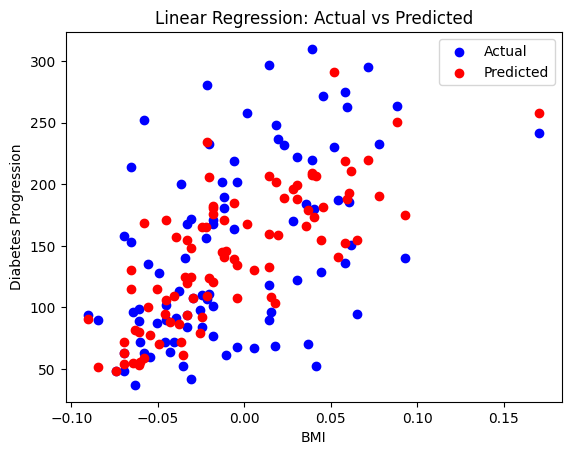

In [ ]:
import matplotlib.pyplot as plt

# Example of plotting one feature against the target
plt.scatter(X_test['bmi'], y_test, color='blue', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


# Polynomial Regression

## Data Loading and preprocessing

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['TARGET'] = diabetes.target

# Define target variable and features
X = data.drop('TARGET', axis=1)
y = data['TARGET']




## #Split the data

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression (example with degree 2)
poly = PolynomialFeatures(degree=2)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train)
# Transform the test data
X_test_poly = poly.transform(X_test)

# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict using the model
y_pred_poly = poly_reg.predict(X_test_poly)




##  # Training and Evaluation

Polynomial Regression (degree 2):
Mean Squared Error: 3096.028307344255
R^2 Score: 0.4156399336408033


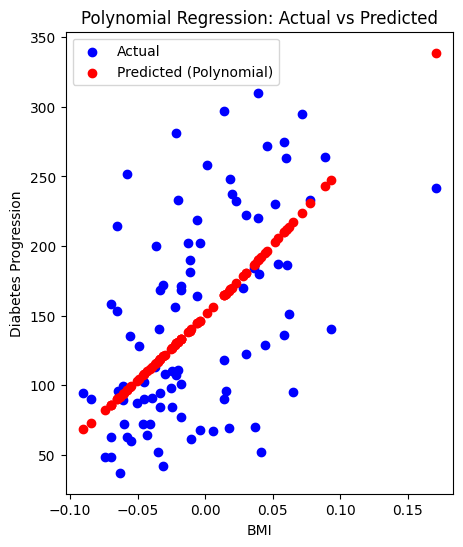

In [ ]:
# Evaluate the model
print("Polynomial Regression (degree 2):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R^2 Score:", r2_score(y_test, y_pred_poly))

# Visualize results for one feature (e.g., 'bmi') - For visualization, focus on single feature
# Transform 'bmi' feature to polynomial features
X_bmi = X[['bmi']]
X_bmi_poly = poly.fit_transform(X_bmi)

# Split the transformed data for visualization
X_bmi_train_poly, X_bmi_test_poly, y_train_bmi, y_test_bmi = train_test_split(X_bmi_poly, y, test_size=0.2, random_state=42)

# Train the model on 'bmi' feature
poly_reg.fit(X_bmi_train_poly, y_train_bmi)
y_pred_bmi_poly = poly_reg.predict(X_bmi_test_poly)

# Plotting
plt.figure(figsize=(5,6))
plt.scatter(X_bmi_test_poly[:, 1], y_test_bmi, color='blue', label='Actual')
plt.scatter(X_bmi_test_poly[:, 1], y_pred_bmi_poly, color='red', label='Predicted (Polynomial)')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()
